

# "Classic" Machine learning methods


In [92]:
import numpy as np

import sys
sys.path.append('../../')
from features.FeatureSet import FeatureSet
from modified_libs import pyplot as plt

%load_ext autoreload
%autoreload 2
import pandas as pd

plt.rcParams["figure.figsize"] = (8, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
def evaluation_plot(test: FeatureSet, classifier):
    test.evaluate_along_label(classifier.predict(test.x), 2.269).plot(marker='o', linestyle='')
    plt.axvline(2.269, c='k')

In [93]:
data = FeatureSet('ising_classical/alps_train.h5').subsample(10000)

In [102]:
train, test = data.split_label_value(train_values={'T': (1, 3.5)}, test_values={'T': (1.2, 2.5)})
train_labels = train.binary_label(2.269)
test_labels = test.binary_label(2.269)

## Supervised methods
### Nearest neighbors

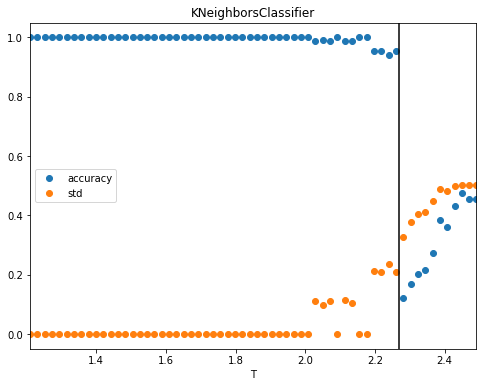

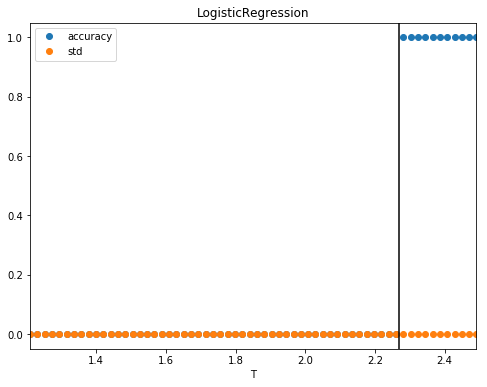

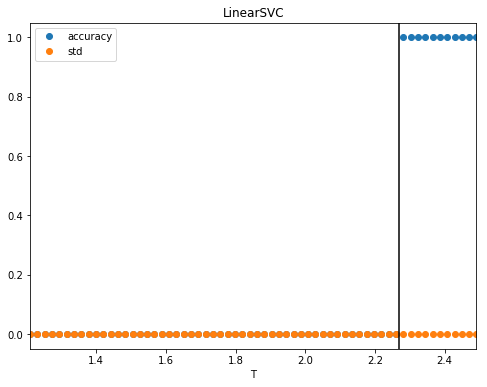

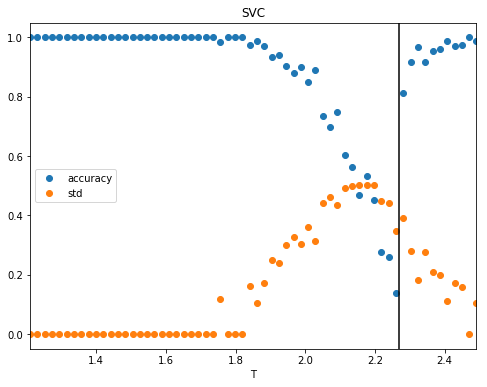

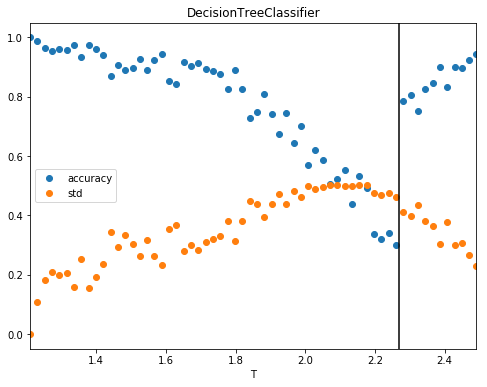

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

for classifier in [KNeighborsClassifier(), LogisticRegression(), LinearSVC(), SVC(), DecisionTreeClassifier()]:
    clf = classifier.fit(train.x, train_labels)
    evaluation_plot(test, clf)
    plt.title(classifier.__class__.__name__)